<a href="https://colab.research.google.com/github/preetsanjam/Time_Series_Forecasting_Wine_Sales/blob/main/TSF_Sparkling_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Sparkling.csv')

In [ ]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [ ]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [ ]:
df.shape

(187, 2)

In [ ]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [ ]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

# 1. Read the data as an appropriate Time Series data and plot the data.

In [ ]:
date = pd.date_range(start = '1/1/1980', end = '8/1/1995', freq='M')

In [ ]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df['Time Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [ ]:
df.set_index(keys='Time Stamp',drop=True, inplace=True)
df.head()

YearMonth  Sparkling
Time Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [ ]:
df.drop(labels='YearMonth', inplace=True, axis=1)
df.head()

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [ ]:
df.tail()

Sparkling
Time Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


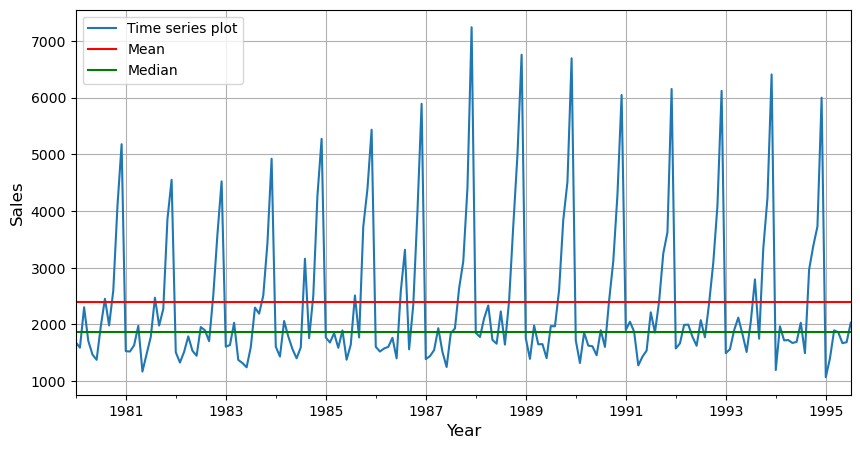

In [ ]:
#Ploting the time series
df.plot(figsize=(10,5))
plt.axhline(df['Sparkling'].mean(), color='Red')
plt.axhline(df['Sparkling'].median(), color='Green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.legend(['Time series plot', 'Mean', 'Median'])
plt.show();

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Yearly boxplot**

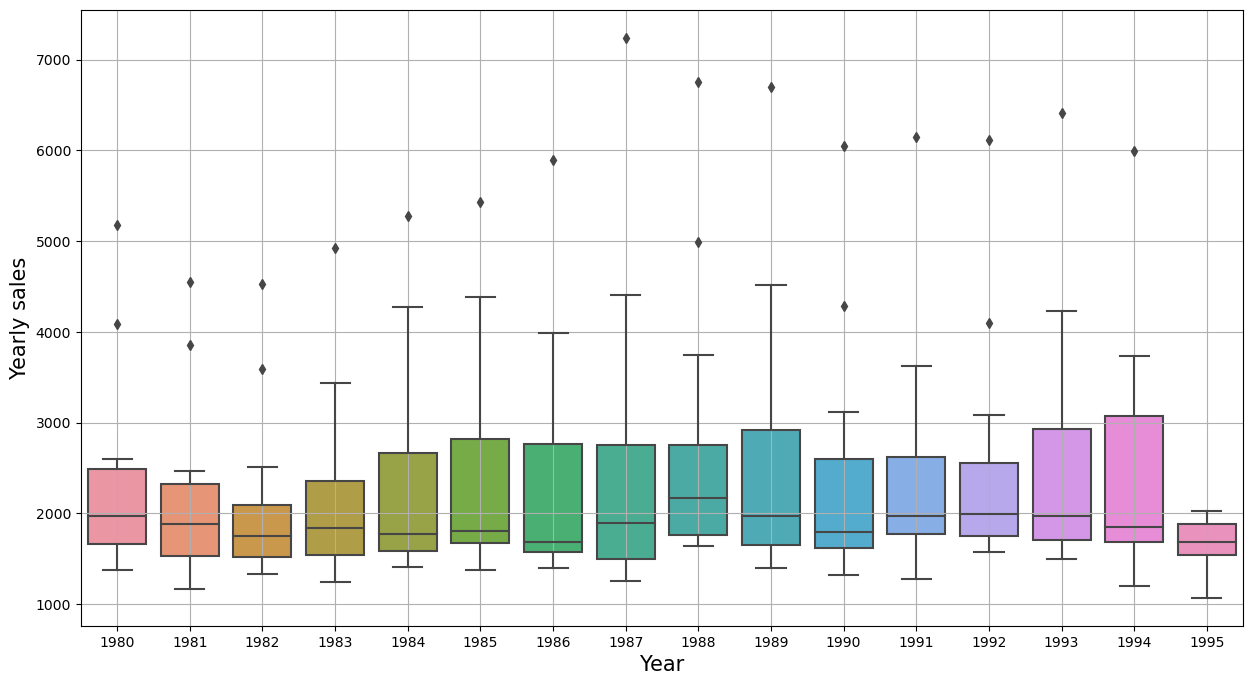

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=df.index.year, y=df['Sparkling'],ax=ax)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Yearly sales', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show();

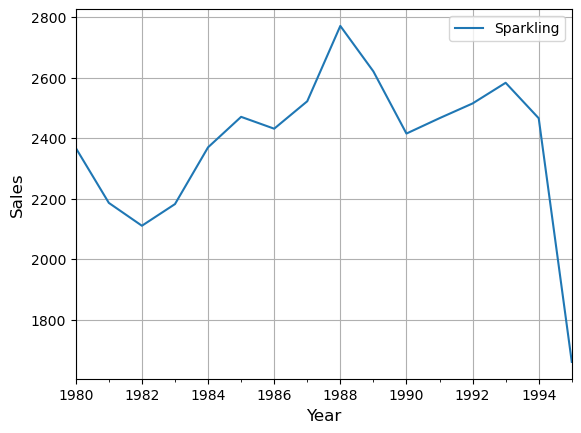

In [ ]:
yearly_sales_mean = df.resample('Y').mean()
yearly_sales_mean.plot()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

**Quaterly boxplot**

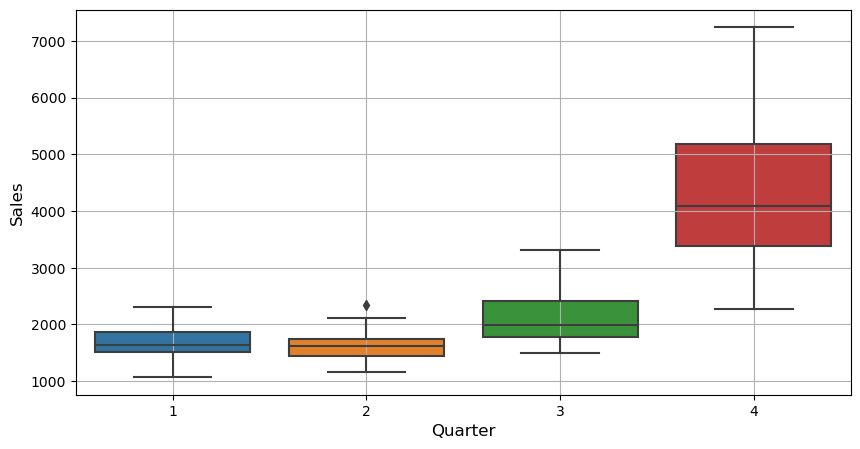

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df.index.quarter, y=df['Sparkling'],ax=ax)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.show();

**Monthly boxplot**

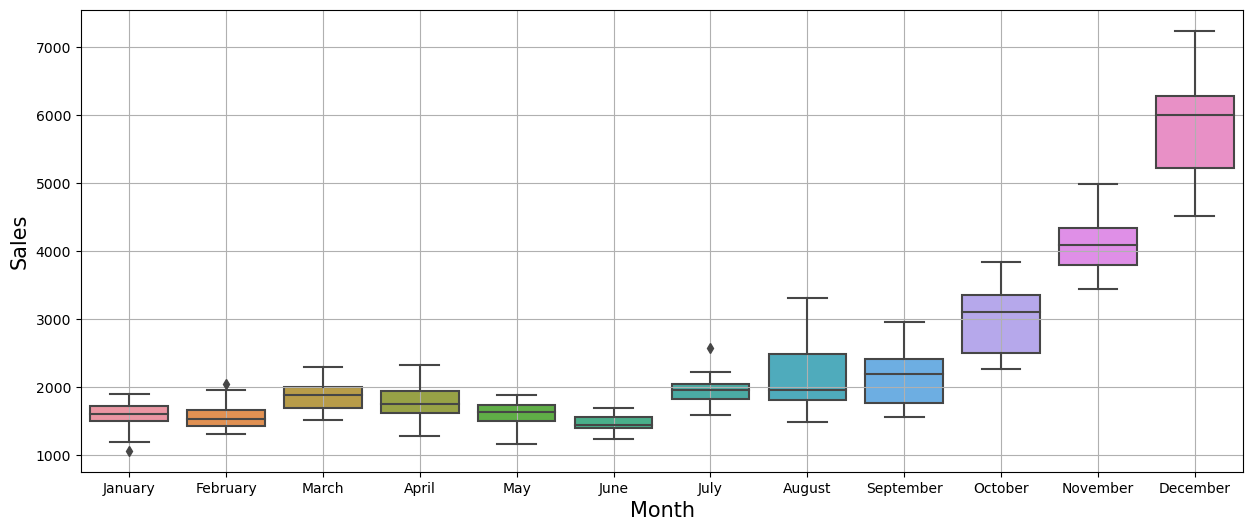

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=df.index.month_name(), y=df['Sparkling'],ax=ax)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.show();

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

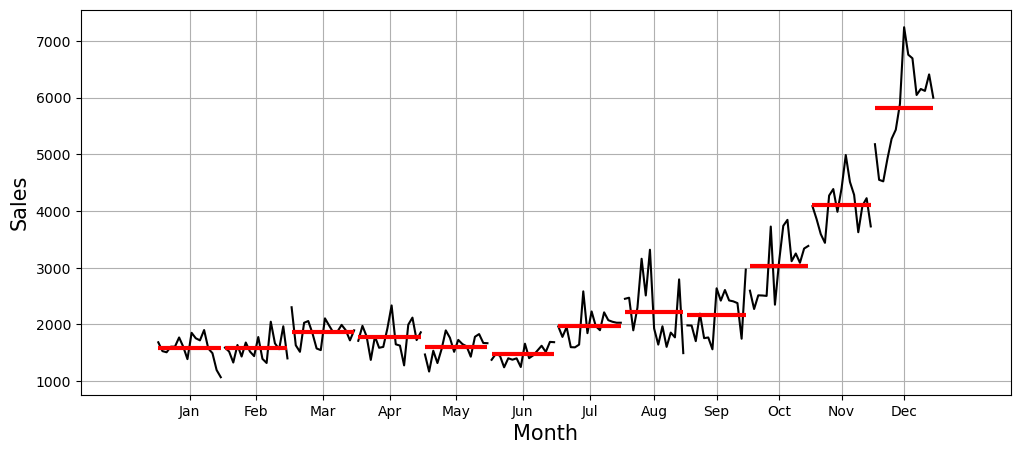

In [ ]:
month_plot(df['Sparkling'], ylabel='Sparkling');
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid();

In [ ]:
monthly_sales_across_years = pd.pivot_table(df, values='Sparkling', columns=df.index.month, index=df.index.year)
monthly_sales_across_years

Time Stamp      1       2       3       4       5       6       7       8   \
Time Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time Stamp      9       10      11      12  
Time Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

**Plot of monthly sales across years**

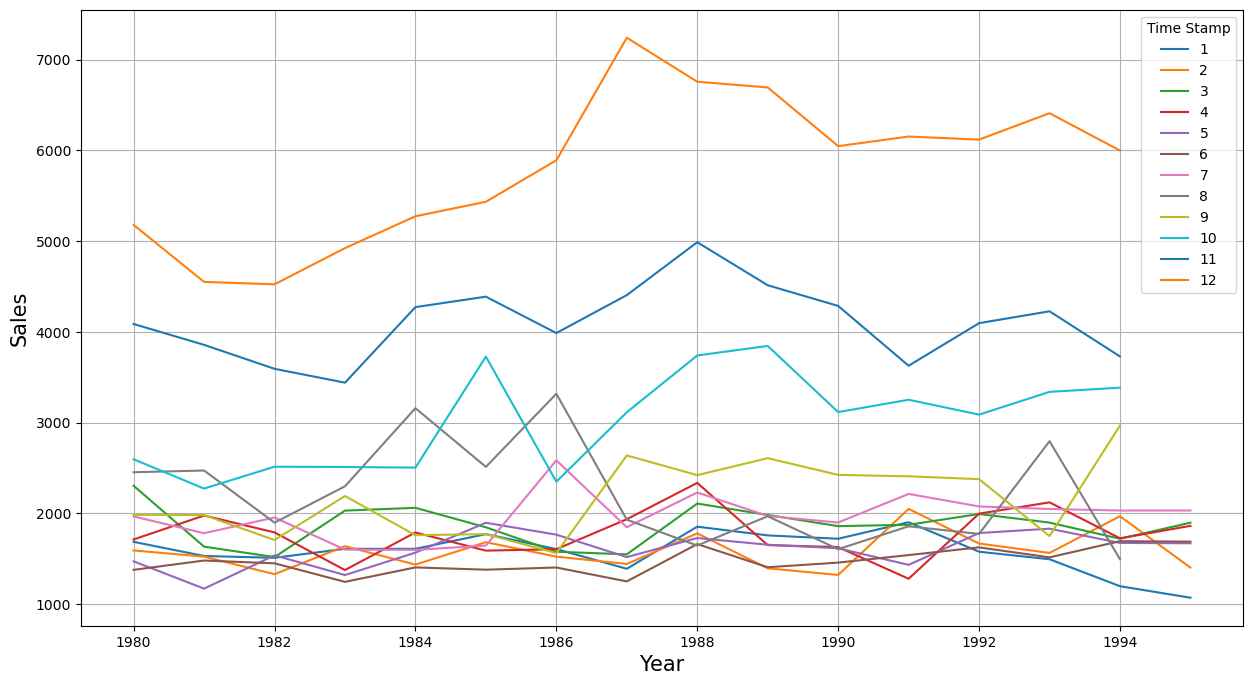

In [ ]:
monthly_sales_across_years.plot(figsize=(15,8))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.grid()
plt.show();

**Day-wise sales**

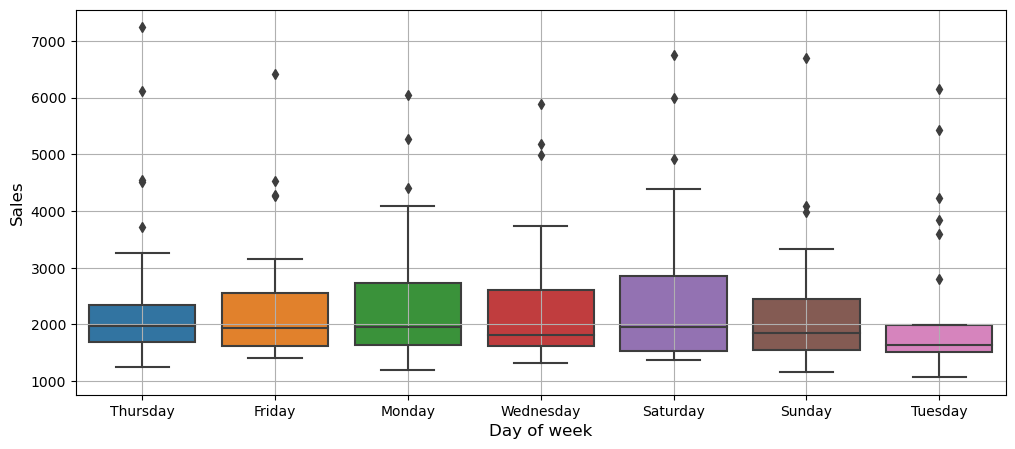

In [ ]:
sns.boxplot(x=df.index.day_name(), y=df['Sparkling'])
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.show();

**Plot the Empirical Cumulative Distribution**

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

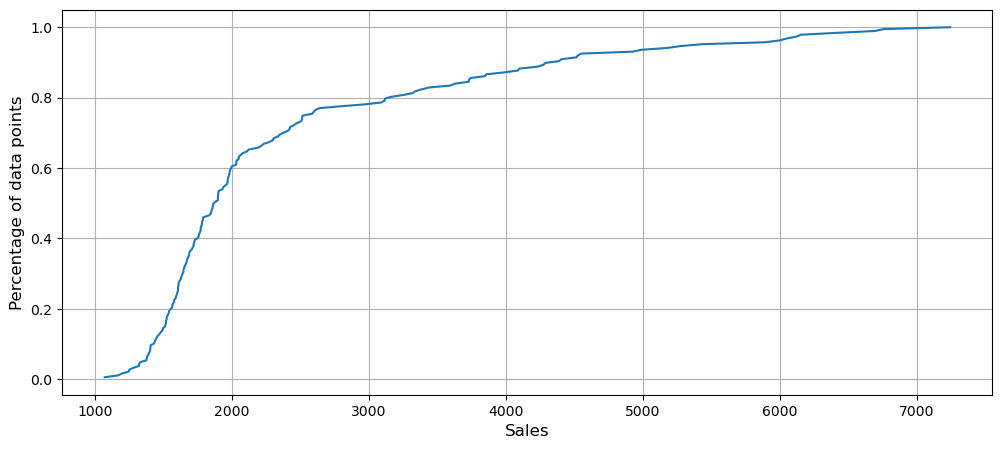

In [ ]:
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label='statsmodels')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Percentage of data points', fontsize=12)
plt.grid()

**Average sales**

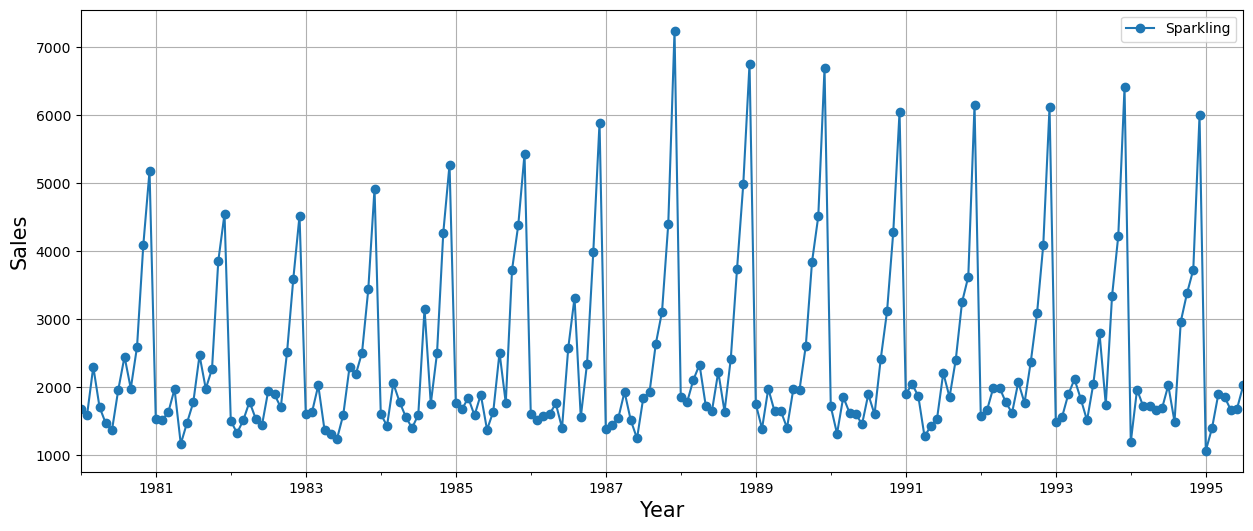

In [ ]:
average = df.groupby(df.index)['Sparkling'].mean()

average.plot(legend=True, marker='o', grid=True, figsize=(15,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show();

**Sales percentage change**

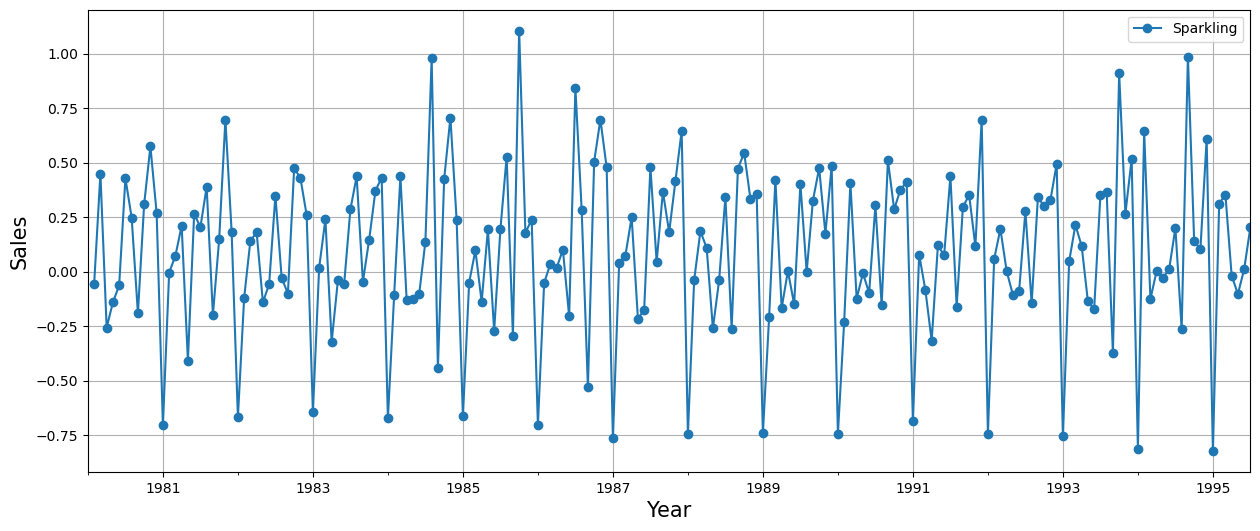

In [ ]:
pct_change = df.groupby(df.index)['Sparkling'].sum().pct_change()


pct_change.plot(legend=True, marker='o', grid=True, figsize=(15,6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show();

**Decompose the series**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

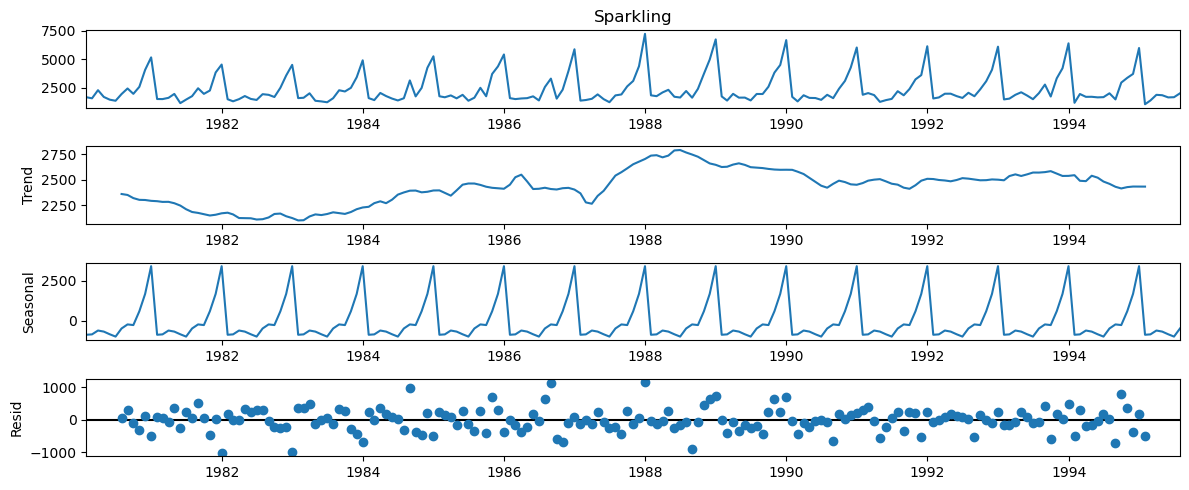

In [ ]:
decomposition = seasonal_decompose(df['Sparkling'], model='additive')
decomposition.plot();

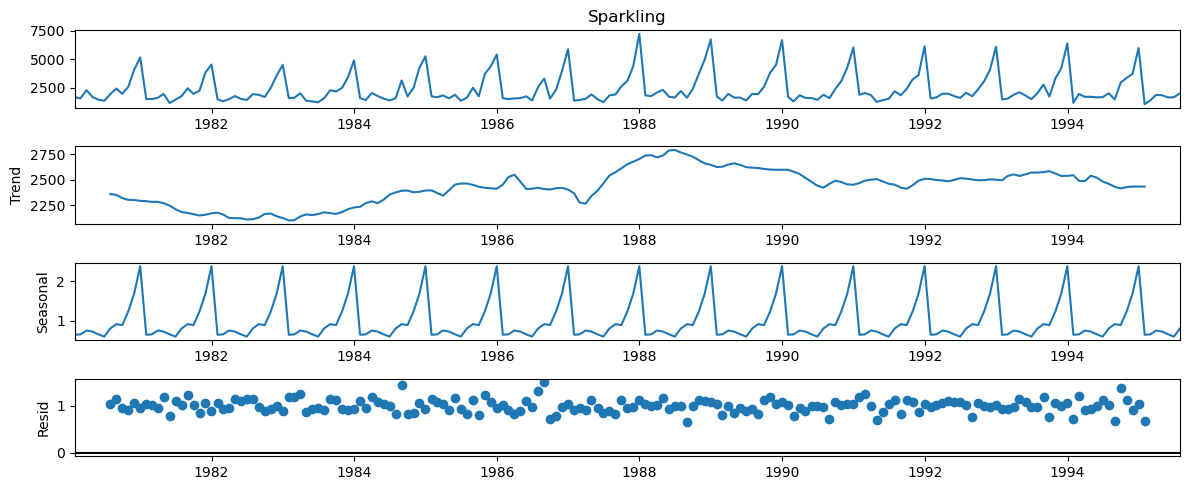

In [ ]:
decomposition_mul = seasonal_decompose(df['Sparkling'], model='multiplicative')
decomposition_mul.plot();

# 3. Split the data into training and test. The test data should start in 1991.

In [ ]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [ ]:
train.head()

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [ ]:
train.tail()

Sparkling
Time Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [ ]:
test.head()

Sparkling
Time Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [ ]:
test.tail()

Sparkling
Time Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [ ]:
print('Train set', '\n''No. of rows:', train.shape[0], '\n''No. of colums:', train.shape[1])
print('\n')
print('Test set', '\n''No. of rows:', test.shape[0], '\n''No. of columns:', test.shape[1])

Train set 
No. of rows: 132 
No. of colums: 1


Test set 
No. of rows: 55 
No. of columns: 1


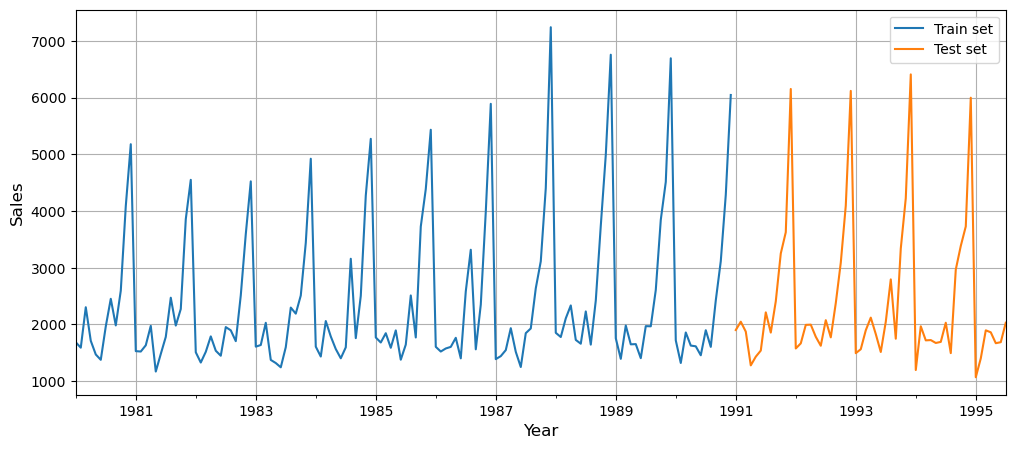

In [ ]:
#Plot train and test time series
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.legend(['Train set', 'Test set'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

# Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [ ]:
print('Training time instance', '\n', train_time)
print('\n')
print('Test time instance', '\n', test_time)

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [ ]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling'])

LinearRegression()

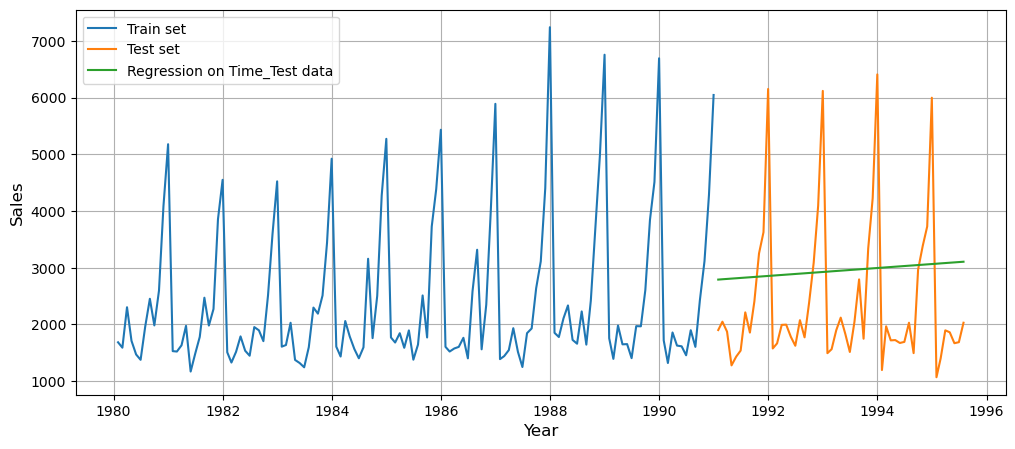

In [ ]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Reg_on_time'] = test_predictions_model1

plt.plot(train['Sparkling'], label='Train set')
plt.plot(test['Sparkling'], label='Test set')
plt.plot(LinearRegression_test['Reg_on_time'], label='Regression on Time_Test data')
plt.legend()
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
#Model evaluation
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'], test_predictions_model1, squared=False)
print('For Regression on time forecast, RMSE:', rmse_model1_test)

For Regression on time forecast, RMSE: 1389.135174897992


In [ ]:
results_DF = pd.DataFrame({'Test RMSE': [rmse_model1_test]}, index=['Regression on time'])
results_DF

Test RMSE
Regression on time  1389.135175

# Model 2: Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
train['Sparkling'][len(train)-1]

6047

In [ ]:
NaiveModel_test['Naive'] = train['Sparkling'][len(train)-1]
NaiveModel_test.head()

Sparkling  Naive
Time Stamp                  
1991-01-31       1902   6047
1991-02-28       2049   6047
1991-03-31       1874   6047
1991-04-30       1279   6047
1991-05-31       1432   6047

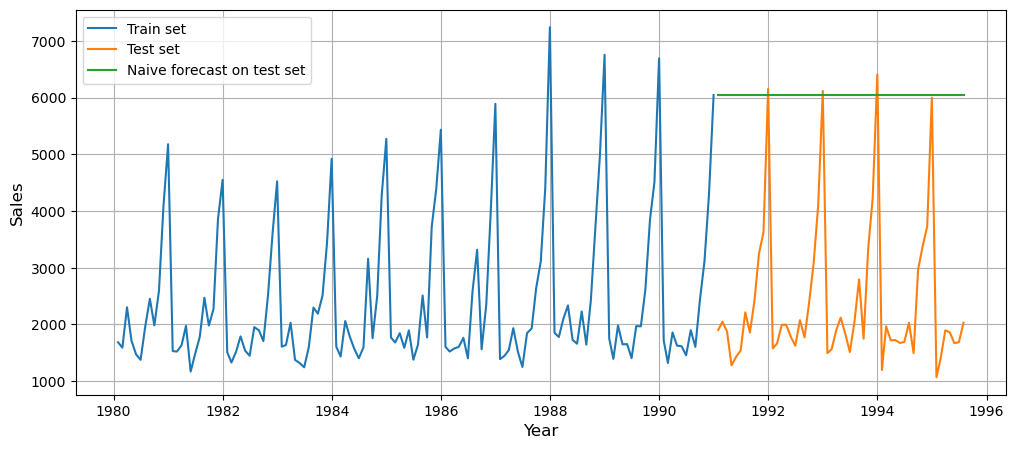

In [ ]:
plt.plot(NaiveModel_train['Sparkling'], label='Train set')
plt.plot(test['Sparkling'], label='Test set')
plt.plot(NaiveModel_test['Naive'], label='Naive forecast on test set')
plt.legend()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid();

In [ ]:
#Model evaluation
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'], NaiveModel_test['Naive'], squared=False)
print('For Regression-on-time forecast on Test set, RMSE:', rmse_model2_test)

For Regression-on-time forecast on Test set, RMSE: 3864.2793518443914


In [ ]:
results_DF2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}, index=['Naive Model'])

results_DF = pd.concat([results_DF, results_DF2])
results_DF

Test RMSE
Regression on time  1389.135175
Naive Model         3864.279352

# Model 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
train["Sparkling"].mean()

2403.780303030303

In [ ]:
SimpleAverage_test['Mean Forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  Mean Forecast
Time Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

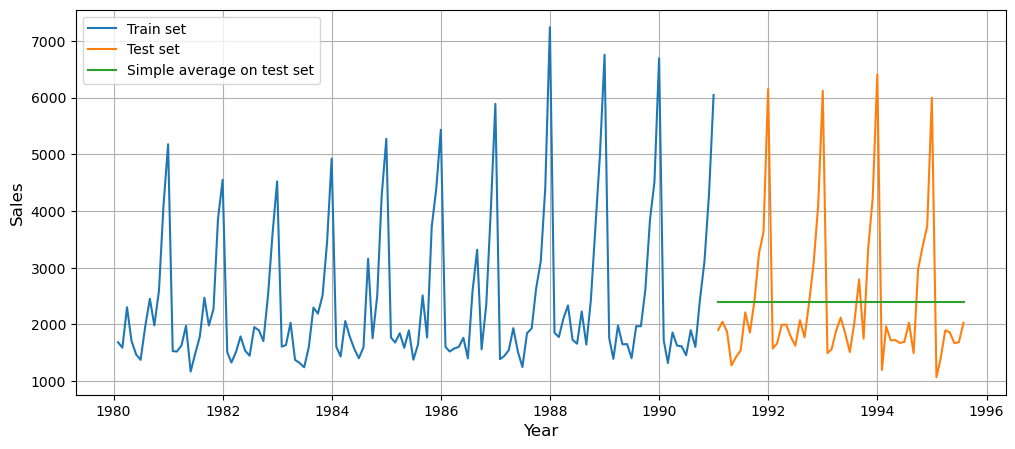

In [ ]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train set')
plt.plot(SimpleAverage_test['Sparkling'], label='Test set')
plt.plot(SimpleAverage_test['Mean Forecast'], label='Simple average on test set')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.grid()

In [ ]:
#Model evaluation
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'], SimpleAverage_test['Mean Forecast'], squared=False)
print('For Simple Average forecast on test set, RMSE:', rmse_model3_test)

For Simple Average forecast on test set, RMSE: 1275.0818036965309


In [ ]:
results_DF3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

results_DF = pd.concat([results_DF, results_DF3])
results_DF

Test RMSE
Regression on time    1389.135175
Naive Model           3864.279352
Simple Average Model  1275.081804

# Model 4: Moving Average

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

In [ ]:
MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

In [ ]:
MovingAverage.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time Stamp                                                             
1995-03-31       1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-30       1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-31       1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-30       1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-31       2031      1859.5     1812.75  1758.333333  2372.000000

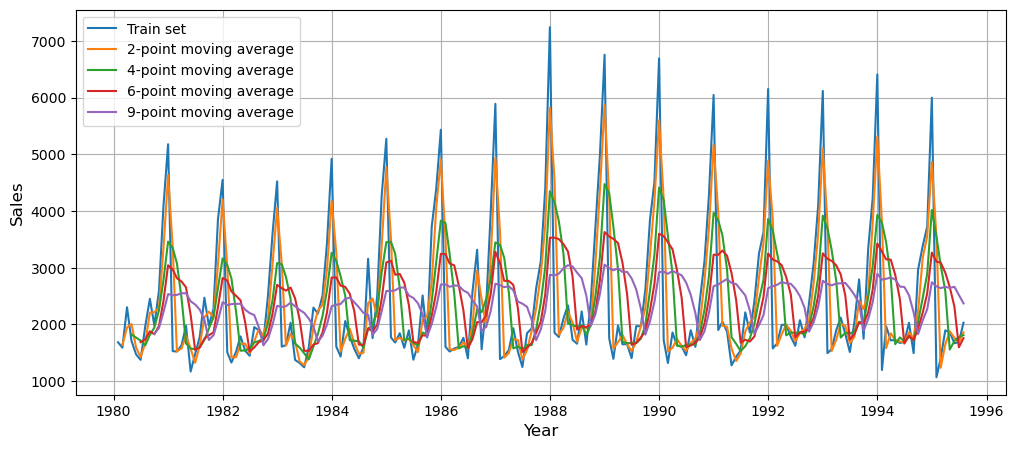

In [ ]:
#Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train set')
plt.plot(MovingAverage['Trailing_2'], label='2-point moving average')
plt.plot(MovingAverage['Trailing_4'], label='4-point moving average')
plt.plot(MovingAverage['Trailing_6'], label='6-point moving average')
plt.plot(MovingAverage['Trailing_9'], label='9-point moving average')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Split the data into train and test sets
trailing_MA_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MA_test = MovingAverage[MovingAverage.index.year >= 1991]

In [ ]:
trailing_MA_train.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time Stamp                                                           
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

In [ ]:
trailing_MA_train.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time Stamp                                                             
1990-08-31       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-30       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-31       3116      2770.0     2261.00  2019.333333  1880.444444
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222

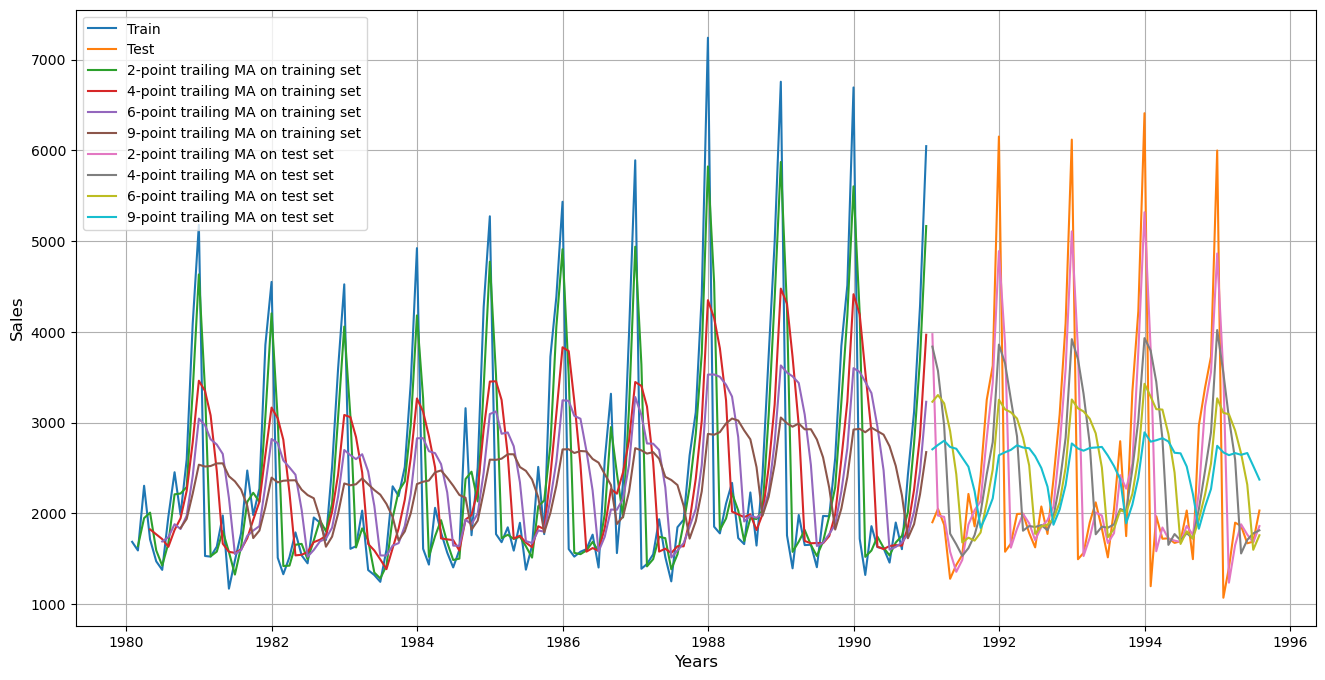

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MA_train['Sparkling'], label='Train')
plt.plot(trailing_MA_test['Sparkling'], label='Test')

plt.plot(trailing_MA_train['Trailing_2'], label = '2-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_4'], label = '4-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_6'], label = '6-point trailing MA on training set')
plt.plot(trailing_MA_train['Trailing_9'], label = '9-point trailing MA on training set')

plt.plot(trailing_MA_test['Trailing_2'], label = '2-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_4'], label = '4-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_6'], label = '6-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_9'], label = '9-point trailing MA on test set')

plt.xlabel('Years', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc = 'best')
plt.grid();

In [ ]:
#Trailing MA on training set

trailing_MA_train['Trailing_2'] = trailing_MA_train['Sparkling'].rolling(2).mean()
trailing_MA_train['Trailing_4'] = trailing_MA_train['Sparkling'].rolling(4).mean()
trailing_MA_train['Trailing_6'] = trailing_MA_train['Sparkling'].rolling(6).mean()
trailing_MA_train['Trailing_9'] = trailing_MA_train['Sparkling'].rolling(9).mean()

In [ ]:
trailing_MA_train.tail()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time Stamp                                                             
1990-08-31       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-30       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-31       3116      2770.0     2261.00  2019.333333  1880.444444
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222

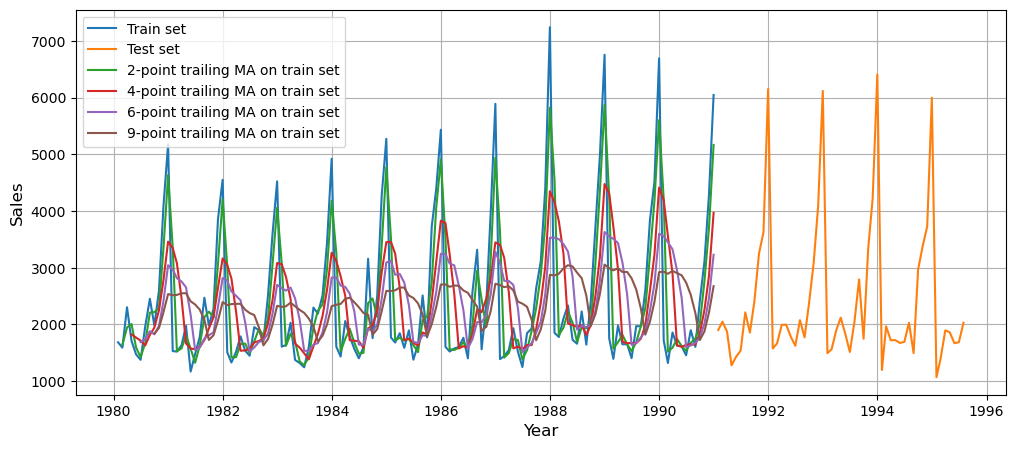

In [ ]:
plt.plot(trailing_MA_train['Sparkling'], label='Train set')
plt.plot(trailing_MA_test['Sparkling'], label='Test set')

plt.plot(trailing_MA_train['Trailing_2'], label='2-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_4'], label='4-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_6'], label='6-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_9'], label='9-point trailing MA on train set')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid()

In [ ]:
trailing_MA_test['Trailing_2'] = 5166.5
trailing_MA_test['Trailing_4'] = 3968.25
trailing_MA_test['Trailing_6'] = 3229.500000
trailing_MA_test['Trailing_9'] = 2675.222222

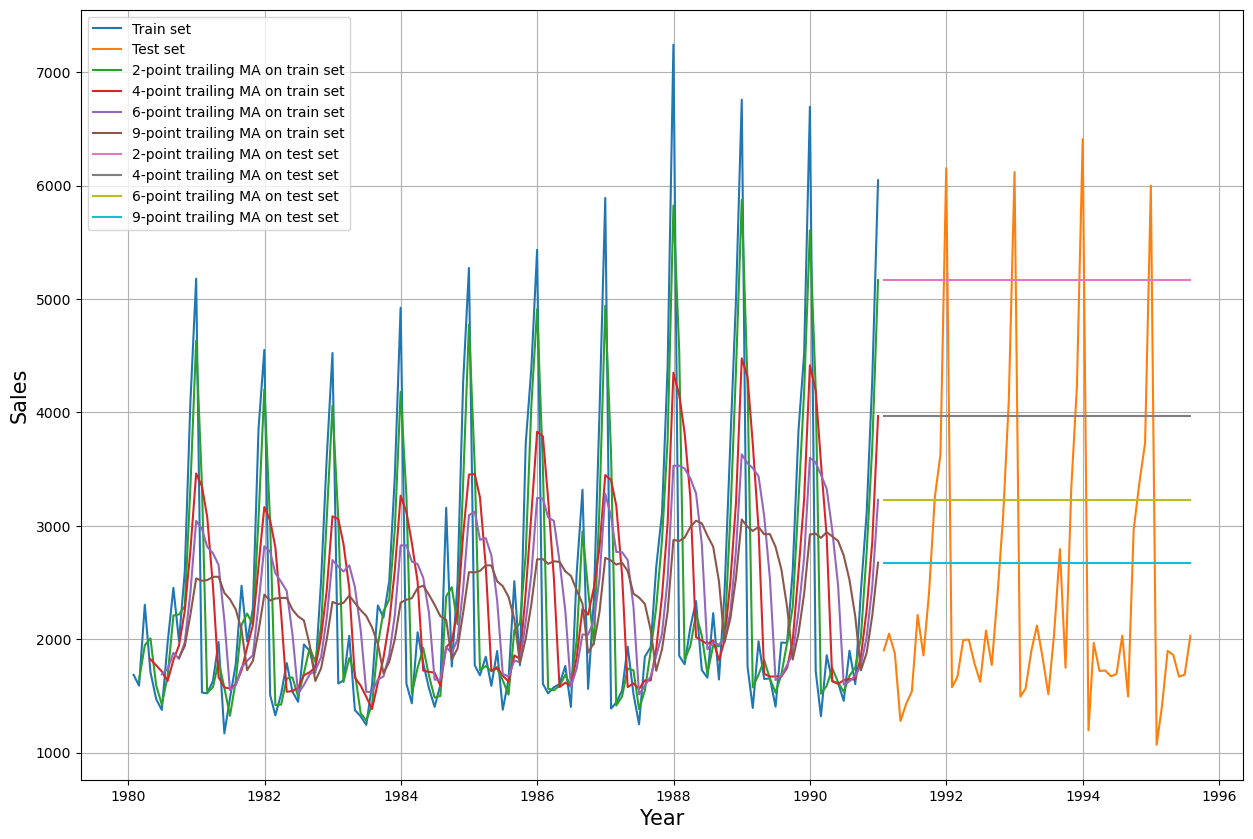

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(trailing_MA_train['Sparkling'], label='Train set')
plt.plot(trailing_MA_test['Sparkling'], label='Test set')

plt.plot(trailing_MA_train['Trailing_2'], label='2-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_4'], label='4-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_6'], label='6-point trailing MA on train set')
plt.plot(trailing_MA_train['Trailing_9'], label='9-point trailing MA on train set')

plt.plot(trailing_MA_test['Trailing_2'], label='2-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_4'], label='4-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_6'], label='6-point trailing MA on test set')
plt.plot(trailing_MA_test['Trailing_9'], label='9-point trailing MA on test set')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales', fontsize=15)

plt.legend(loc='best')
plt.grid()

In [ ]:
#RMSE -- 2-point trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'], trailing_MA_test['Trailing_2'], squared=False)
print('For 2-point trailing MA forecast on test set, RMSE is', rmse_model4_test_2)

#RMSE -- 4-point trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'], trailing_MA_test['Trailing_4'], squared=False)
print('For 4-point trailing MA forecast on test set, RMSE is', rmse_model4_test_4)

#RMSE -- 6-point trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'], trailing_MA_test['Trailing_6'], squared=False)
print('For 6-point trailing MA forecast on test set, RMSE is', rmse_model4_test_6)

#RMSE -- 9-point trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'], trailing_MA_test['Trailing_9'], squared=False)
print('For 9-point trailing MA forecast on test set, RMSE is', rmse_model4_test_9)

For 2-point trailing MA forecast on test set, RMSE is 3046.9760918893758
For 4-point trailing MA forecast on test set, RMSE is 2021.8558798449596
For 6-point trailing MA forecast on test set, RMSE is 1521.6112497791758
For 9-point trailing MA forecast on test set, RMSE is 1304.6189121063944


In [ ]:
results_DF4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index=['2-point trailing Moving Average',
                                 '4-point trailing Moving Average',
                                 '6-point trailing Moving Average',
                                 '9-point trailing Moving Average'])

results_DF = pd.concat([results_DF, results_DF4])
results_DF

Test RMSE
Regression on time               1389.135175
Naive Model                      3864.279352
Simple Average Model             1275.081804
2-point trailing Moving Average  3046.976092
4-point trailing Moving Average  2021.855880
6-point trailing Moving Average  1521.611250
9-point trailing Moving Average  1304.618912

# Model 5: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES= SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_SES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.049607       True
initial_level      l.0  1818.504754       True

In [ ]:
SES_test['Predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      Predict
Time Stamp                        
1991-01-31       1902  2724.929339
1991-02-28       2049  2724.929339
1991-03-31       1874  2724.929339
1991-04-30       1279  2724.929339
1991-05-31       1432  2724.929339

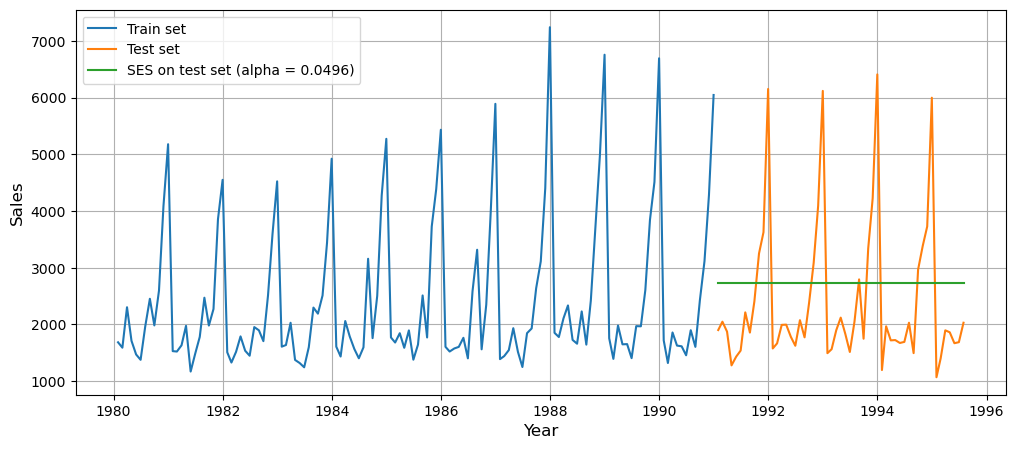

In [ ]:
#Plotting on both test and train sets

plt.plot(SES_train['Sparkling'], label='Train set')
plt.plot(SES_test['Sparkling'], label='Test set')

plt.plot(SES_test['Predict'], label="SES on test set (alpha = 0.0496)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.0496
rmse_model5_test = metrics.mean_squared_error(SES_test['Sparkling'], SES_test['Predict'], squared=False)
print('For alpha = 0.0496, SES forecast on test set, RMSE is', rmse_model5_test)

For alpha = 0.0496, SES forecast on test set, RMSE is 1316.034674096144


In [ ]:
results_DF5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}, index=["Simple Exp Smoothing (alpha = 0.0496)"])

results_DF = pd.concat([results_DF, results_DF5])
results_DF

Test RMSE
Regression on time                     1389.135175
Naive Model                            3864.279352
Simple Average Model                   1275.081804
2-point trailing Moving Average        3046.976092
4-point trailing Moving Average        2021.855880
6-point trailing Moving Average        1521.611250
9-point trailing Moving Average        1304.618912
Simple Exp Smoothing (alpha = 0.0496)  1316.034674

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [ ]:
## First we will define an empty dataframe to store our values from the loop

results_SES = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_SES

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3,1,0.1):
    print(i)

0.3
0.4
0.5
0.6000000000000001
0.7000000000000002
0.8000000000000003
0.9000000000000001


In [ ]:
for i in np.arange(0.3,1,0.1):
    print(round(i,2))

0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [ ]:
for i in np.arange(0.3,1,0.1): # range - 0.3,0.4,0.5...0.9
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=len(test))

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['Predict',i],squared=False)

    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['Predict',i],squared=False)

    results_SES = results_SES.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [ ]:
results_SES

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

In [ ]:
results_SES.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

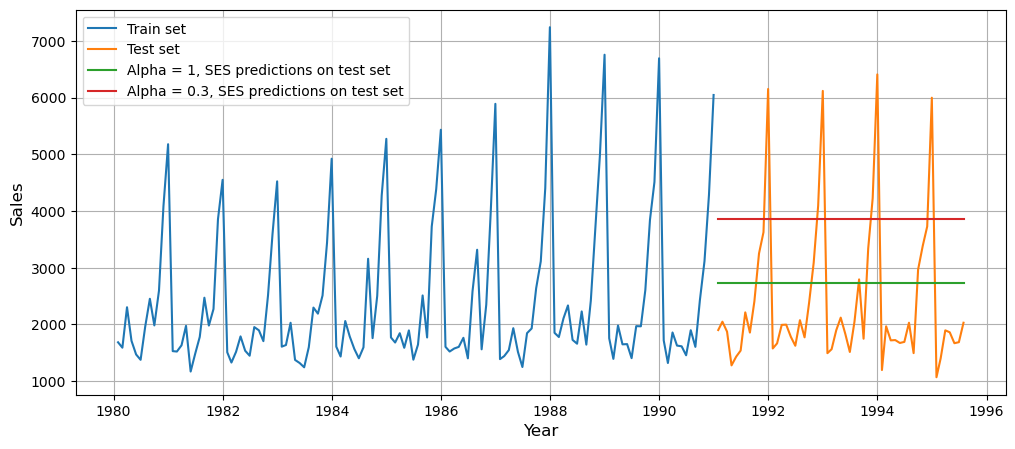

In [ ]:
#PLotting on both test and train sets

plt.plot(SES_train['Sparkling'], label='Train set')
plt.plot(SES_test['Sparkling'], label='Test set')

plt.plot(SES_test['Predict'], label='Alpha = 1, SES predictions on test set')
plt.plot(SES_test['Predict', 0.3], label='Alpha = 0.3, SES predictions on test set')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
resultsDF_5_1 = pd.DataFrame({'Test RMSE': [results_SES.sort_values(by=['Test RMSE'], ascending=True).values[0][2]]}
                             ,index=["Simple Exp Smoothing (alpha = 0.3)"])

results_DF = pd.concat([results_DF, resultsDF_5_1])
results_DF

Test RMSE
Regression on time                     1389.135175
Naive Model                            3864.279352
Simple Average Model                   1275.081804
2-point trailing Moving Average        3046.976092
4-point trailing Moving Average        2021.855880
6-point trailing Moving Average        1521.611250
9-point trailing Moving Average        1304.618912
Simple Exp Smoothing (alpha = 0.0496)  1316.034674
Simple Exp Smoothing (alpha = 0.3)     1935.507132

# Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_DES_autofit = model_DES.fit(optimized=True, use_brute=True)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
model_DES_autofit.params_formatted

name        param  optimized
smoothing_level  alpha     0.688571       True
smoothing_trend   beta     0.000100       True
initial_level      l.0  1686.000000       True
initial_trend      b.0   -95.000000       True

In [ ]:
DES_test['Predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      Predict
Time Stamp                        
1991-01-31       1902  5221.278699
1991-02-28       2049  5127.886554
1991-03-31       1874  5034.494409
1991-04-30       1279  4941.102264
1991-05-31       1432  4847.710119

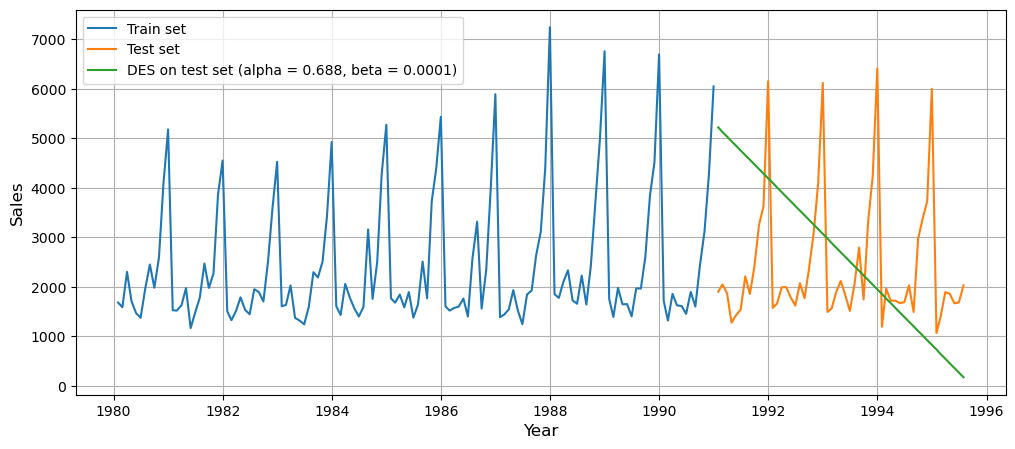

In [ ]:
#Plotting on both test and train sets

plt.plot(DES_train['Sparkling'], label='Train set')
plt.plot(DES_test['Sparkling'], label='Test set')

plt.plot(DES_test['Predict'], label="DES on test set (alpha = 0.688, beta = 0.0001)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.688, beta = 0.0001
rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'], DES_test['Predict'], squared=False)
print('For alpha = 0.688, beta = 0.0001, DES forecast on test set, RMSE is', rmse_model6_test)

For alpha = 0.688, beta = 0.0001, DES forecast on test set, RMSE is 2007.238525758568


In [ ]:
results_DF6 = pd.DataFrame({'Test RMSE':[rmse_model6_test]}, index=["Double Exp Smoothing (alpha = 0.688, beta = 0.0001)"])

results_DF = pd.concat([results_DF, results_DF6])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526

**Setting different alpha and beta values**

In [ ]:
results_DES = pd.DataFrame({'Alpha values': [], 'Beta values': [], 'Train RMSE':[], 'Test RMSE':[]})
results_DES

Empty DataFrame
Columns: [Alpha values, Beta values, Train RMSE, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['Predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['Predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))

        rmse_model6_train_1 = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['Predict',i,j],squared=False)

        rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['Predict',i,j],squared=False)

        results_DES = results_DES.append({'Alpha values':i,'Beta values':j,'Train RMSE':rmse_model6_train_1
                                          ,'Test RMSE':rmse_model6_test_1}, ignore_index=True)

In [ ]:
results_DES

Alpha values  Beta values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [ ]:
results_DES.sort_values(by=['Test RMSE']).head()

Alpha values  Beta values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

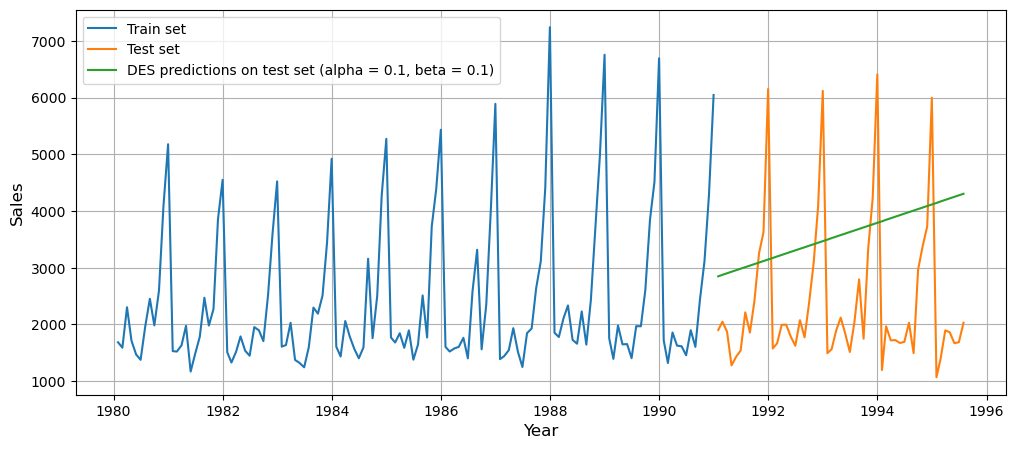

In [ ]:
#PLotting on both train and test sets

plt.plot(DES_train['Sparkling'],label='Train set')
plt.plot(DES_test['Sparkling'], label='Test set')

plt.plot(DES_test['Predict', 0.1, 0.1], label="DES predictions on test set (alpha = 0.1, beta = 0.1)")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid()

In [ ]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [results_DES.sort_values(by=['Test RMSE']).values[0][3]]}
                            , index=["Double Exp Smoothing (alpha = 0.1, beta = 0.1)"])

results_DF = pd.concat([results_DF, resultsDf_6_1])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670

# Model 7: Triple Exponential Smoothing

Three parameters α , β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

**Multiplicative Seasonality**

In [ ]:
model_1_TES = ExponentialSmoothing(TES_train['Sparkling'], trend = 'additive', seasonal = 'multiplicative')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_1_TES_autofit = model_1_TES.fit()

In [ ]:
model_1_TES_autofit.params_formatted

name        param  optimized
smoothing_level     alpha     0.111041       True
smoothing_trend      beta     0.049348       True
smoothing_seasonal  gamma     0.362328       True
initial_level         l.0  2356.510723       True
initial_trend         b.0    -9.729117       True
initial_seasons.0     s.0     0.712519       True
initial_seasons.1     s.1     0.683070       True
initial_seasons.2     s.2     0.905966       True
initial_seasons.3     s.3     0.805840       True
initial_seasons.4     s.4     0.656050       True
initial_seasons.5     s.5     0.654249       True
initial_seasons.6     s.6     0.887964       True
initial_seasons.7     s.7     1.133912       True
initial_seasons.8     s.8     0.919201       True
initial_seasons.9     s.9     1.212238       True
initial_seasons.10   s.10     1.870747       True
initial_seasons.11   s.11     2.374642       True

In [ ]:
TES_test['Auto predict'] = model_1_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  Auto predict
Time Stamp                         
1991-01-31       1902   1587.864666
1991-02-28       2049   1356.648339
1991-03-31       1874   1763.307702
1991-04-30       1279   1656.501849
1991-05-31       1432   1542.339421

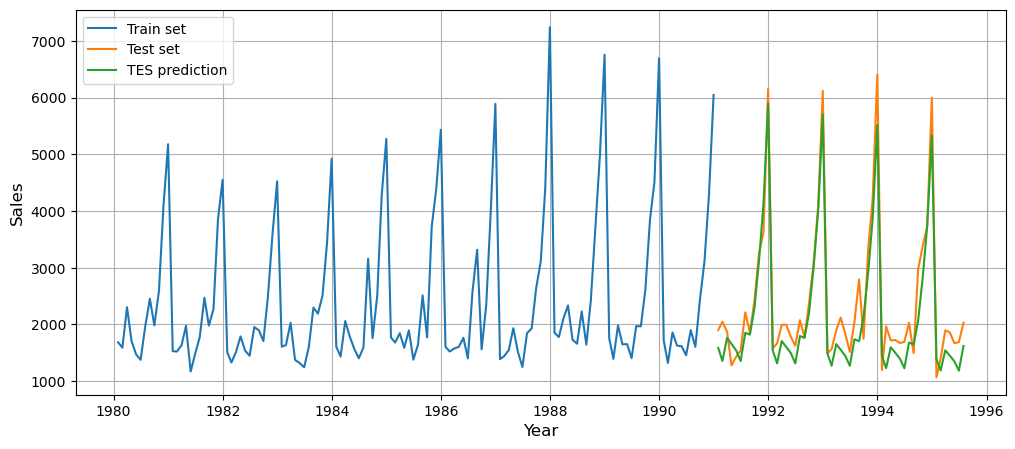

In [ ]:
#Plotting on train and test sets
#alpha = 0.111, beta = 0.493, gamma = 0.362

plt.plot(TES_train['Sparkling'], label = 'Train set')
plt.plot(TES_test['Sparkling'], label = 'Test set')

plt.plot(TES_test['Auto predict'], label = "TES prediction")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc='upper left')
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.111, beta = 0.493, gamma = 0.362
rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'], TES_test['Auto predict'], squared=False)
print('For alpha = 0.111, beta = 0.493, gamma = 0.362, TES forecast on test set, RMSE is', rmse_model7_test)

For alpha = 0.111, beta = 0.493, gamma = 0.362, TES forecast on test set, RMSE is 403.125867235564


In [ ]:
results_DF7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]},
                           index = ["Triple Exp Smoothing (alpha = 0.111, beta = 0.493, gamma = 0.362)"])

results_DF = pd.concat([results_DF, results_DF7])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867

**Addtive Seasonality**

In [ ]:
model_2_TES = ExponentialSmoothing(TES_train['Sparkling'], trend = 'additive', seasonal = 'additive')

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
model_2_TES_autofit = model_2_TES.fit()

In [ ]:
model_2_TES_autofit.params_formatted

name        param  optimized
smoothing_level     alpha     0.111272       True
smoothing_trend      beta     0.012361       True
smoothing_seasonal  gamma     0.460718       True
initial_level         l.0  2356.578046       True
initial_trend         b.0    -0.100711       True
initial_seasons.0     s.0  -636.233207       True
initial_seasons.1     s.1  -722.983211       True
initial_seasons.2     s.2  -398.644088       True
initial_seasons.3     s.3  -473.430461       True
initial_seasons.4     s.4  -808.424745       True
initial_seasons.5     s.5  -815.349926       True
initial_seasons.6     s.6  -384.230707       True
initial_seasons.7     s.7    72.994802       True
initial_seasons.8     s.8  -237.442275       True
initial_seasons.9     s.9   272.326023       True
initial_seasons.10   s.10  1541.377398       True
initial_seasons.11   s.11  2590.076889       True

In [ ]:
TES_test['Auto predict'] = model_2_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  Auto predict
Time Stamp                         
1991-01-31       1902   1490.406418
1991-02-28       2049   1204.529041
1991-03-31       1874   1688.738437
1991-04-30       1279   1551.230744
1991-05-31       1432   1461.202870

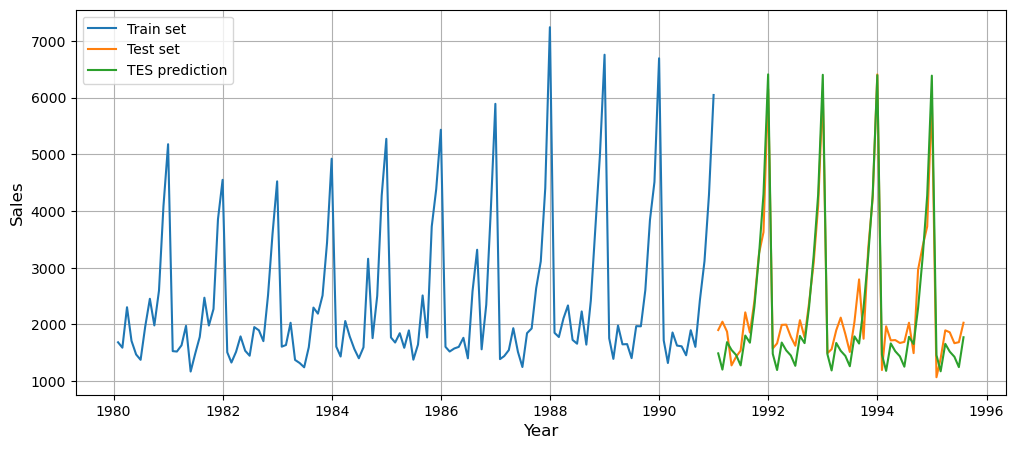

In [ ]:
#Plotting on train and test sets
#alpha = 0.111, beta = 0.124, gamma = 0.461

plt.plot(TES_train['Sparkling'], label = 'Train set')
plt.plot(TES_test['Sparkling'], label = 'Test set')

plt.plot(TES_test['Auto predict'], label = "TES prediction")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(loc='upper left')
plt.grid();

In [ ]:
#Model evaluation for alpha = 0.111, beta = 0.124, gamma = 0.461
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'], TES_test['Auto predict'], squared=False)
print('For alpha = 0.111, beta = 0.124, gamma = 0.461, TES forecast on test set, RMSE is', rmse_model7_test_1)

For alpha = 0.111, beta = 0.124, gamma = 0.461, TES forecast on test set, RMSE is 378.9443254087722


In [ ]:
results_DF7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},
                           index = ["Triple Exp Smoothing (alpha = 0.111, beta = 0.124, gamma = 0.461)"])

results_DF = pd.concat([results_DF, results_DF7_1])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867
Triple Exp Smoothing (alpha = 0.111, beta = 0.1...   378.944325

**Setting different values of alpha, beta and gamma**

In [ ]:
results_TES = pd.DataFrame({'Alpha values': [], 'Beta values': [], 'Gamma values': [], 'Train RMSE': [], 'Test RMSE': []})
results_TES

Empty DataFrame
Columns: [Alpha values, Beta values, Gamma values, Train RMSE, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.3, 1.1, 0.1):
    for i in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_1_TES.fit(smoothing_level = i,
                                                  smoothing_trend = j,
                                                  smoothing_seasonal = k,
                                                optimized = False, use_brute = True)
            TES_train['Predict',i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['Predict', i, j, k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train_1 = metrics.mean_squared_error(TES_train['Sparkling'], TES_train['Predict', i, j, k], squared = False)
            rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'], TES_test['Predict', i, j, k], squared = False)

            results_TES = results_TES.append({'Alpha values': i,
                                            'Beta values': j,
                                            'Gamma values': k,
                                            'Train RMSE': rmse_model7_train_1,
                                            'Test RMSE': rmse_model7_test_1},
                                            ignore_index = True)

In [ ]:
results_TES

Alpha values  Beta values  Gamma values    Train RMSE     Test RMSE
0             0.3          1.0           0.3  4.956321e+02  1.160480e+04
1             0.3          1.0           0.4  5.400167e+02  1.343659e+04
2             0.3          1.0           0.5  6.237000e+02  1.947963e+04
3             0.3          1.0           0.6  7.954729e+02  1.027996e+05
4             0.3          1.0           0.7  3.109037e+03  1.306883e+06
..            ...          ...           ...           ...           ...
507           1.0          1.0           0.6  1.882994e+05  4.386054e+06
508           1.0          1.0           0.7  2.660015e+05  8.649577e+06
509           1.0          1.0           0.8  1.101923e+06  2.700435e+05
510           1.0          1.0           0.9  7.695708e+04  2.472201e+05
511           1.0          1.0           1.0  2.456050e+04  1.256914e+05

[512 rows x 5 columns]

In [ ]:
results_TES.sort_values(by=['Test RMSE']).head()

Alpha values  Beta values  Gamma values  Train RMSE  Test RMSE
296           0.8          1.0           0.3  790.740655  580.26611
424           0.8          1.0           0.3  790.740655  580.26611
104           0.8          1.0           0.3  790.740655  580.26611
40            0.8          1.0           0.3  790.740655  580.26611
488           0.8          1.0           0.3  790.740655  580.26611

In [ ]:
TES_test.head()

Sparkling  Auto predict  (Predict, 0.3, 1.0, 0.3)  \
Time Stamp                                                      
1991-01-31       1902   1490.406418               1670.295751   
1991-02-28       2049   1204.529041               1651.179432   
1991-03-31       1874   1688.738437               2479.527700   
1991-04-30       1279   1551.230744               2767.368710   
1991-05-31       1432   1461.202870               3076.659190   

            (Predict, 0.3, 1.0, 0.4)  (Predict, 0.3, 1.0, 0.5)  \
Time Stamp                                                       
1991-01-31               1645.457182               1698.036222   
1991-02-28               1592.026009               1647.632253   
1991-03-31               2500.834975               2767.799845   
1991-04-30               2800.786153               3235.051136   
1991-05-31               3268.957882               4173.062771   

            (Predict, 0.3, 1.0, 0.6000000000000001)  \
Time Stamp                                            
1991-01-31                              1794.175245   
1991-02-28                              1787.228754   
1991-03-31                              3288.950019   
1991-04-30                              4268.279210   
1991-05-31                              6813.735931   

            (Predict, 0.3, 1.0, 0.7000000000000002)  \
Time Stamp                                            
1991-01-31                              1902.807615   
1991-02-28                              1940.111484   
1991-03-31                              3918.306650   
1991-04-30                              5936.526452   
1991-05-31                             15722.067400   

            (Predict, 0.3, 1.0, 0.8000000000000003)  \
Time Stamp                                            
1991-01-31                              2407.964474   
1991-02-28                              2431.574712   
1991-03-31                              5201.985299   
1991-04-30                              9492.572978   
1991-05-31                              3286.816916   

            (Predict, 0.3, 1.0, 0.9000000000000001)  \
Time Stamp                                            
1991-01-31                              1589.301951   
1991-02-28                              1468.209748   
1991-03-31                              2973.806019   
1991-04-30                              2386.404917   
1991-05-31                             53735.183465   

            (Predict, 0.3, 1.0, 1.0000000000000002)  ...  \
Time Stamp                                           ...   
1991-01-31                              1916.563635  ...   
1991-02-28                              1698.528445  ...   
1991-03-31                              2931.519985  ...   
1991-04-30                              3778.481164  ...   
1991-05-31                              8109.245914  ...   

            (Predict, 0.9000000000000001, 1.0, 0.9000000000000001)  \
Time Stamp                                                           
1991-01-31                                       -8741.746198        
1991-02-28                                       -9629.914753        
1991-03-31                                     -165094.086694        
1991-04-30                                       51646.655634        
1991-05-31                                      795318.696204        

            (Predict, 0.9000000000000001, 1.0, 1.0000000000000002)  \
Time Stamp                                                           
1991-01-31                                        -752.269712        
1991-02-28                                         627.806581        
1991-03-31                                       -1438.329994        
1991-04-30                                        7019.608355        
1991-05-31                                        7785.647932        

            (Predict, 1.0000000000000002, 1.0, 0.3)  \
Time Stamp                                            
1991-01-31                          

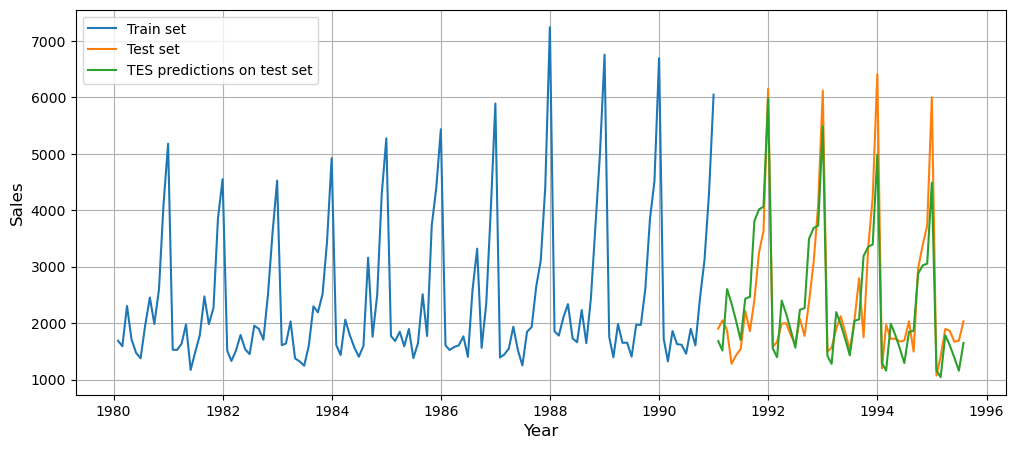

In [ ]:
#Plotting on both training and test sets
plt.plot(TES_train['Sparkling'], label = 'Train set')
plt.plot(TES_test['Sparkling'], label = 'Test set')

plt.plot(TES_test['Predict', 0.8000000000000003, 1.0, 0.3],
         label = "TES predictions on test set")

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend()
plt.grid();

In [ ]:
results_DF7_2 =  pd.DataFrame({'Test RMSE': [results_TES.sort_values(by=['Test RMSE']).values[0][4]]},
                           index = ["Triple Exp Smoothing (alpha = 0.8, beta = 1, gamma = 0.3)"])

results_DF = pd.concat([results_DF, results_DF7_2])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867
Triple Exp Smoothing (alpha = 0.111, beta = 0.1...   378.944325
Triple Exp Smoothing (alpha = 0.8, beta = 1, ga...   580.266110

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 7).mean() #determing rolling mean
    rolstd = timeseries.rolling(window = 7).std() #determing rolling std deviation

    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling std')

    plt.xlabel('Year', fontsize = 12)
    plt.ylabel('Sales', fontsize = 12)

    plt.legend()
    plt.grid()
    plt.show(block = False)

    #Perform Dickey_Fuller test
    print('Results of Dickey-Fuller test')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput, '\n')

In [ ]:
adfuller(train)

(-1.2089255549356313,
 0.6697444263523334,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 1787.464334029196)

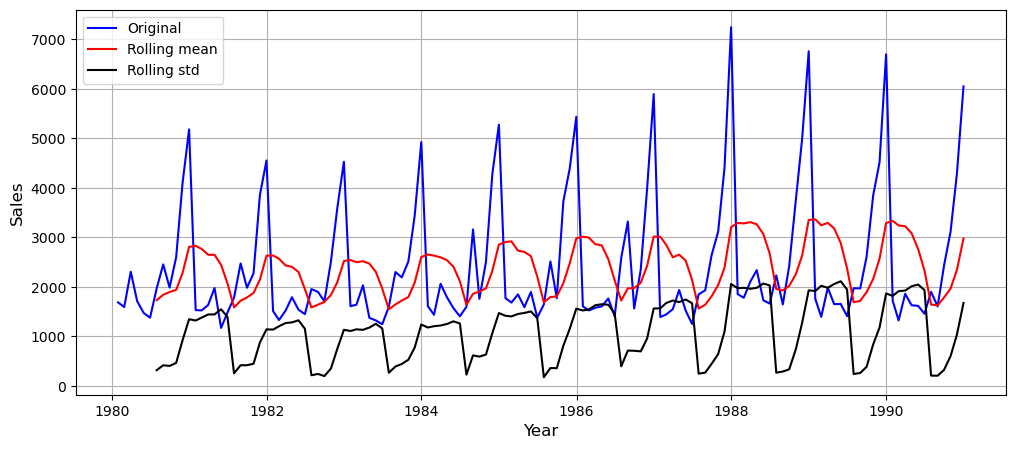

Results of Dickey-Fuller test
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64 



In [ ]:
test_stationarity(train)

**We see that at 5% significant level the Time Series is non-stationary**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not**

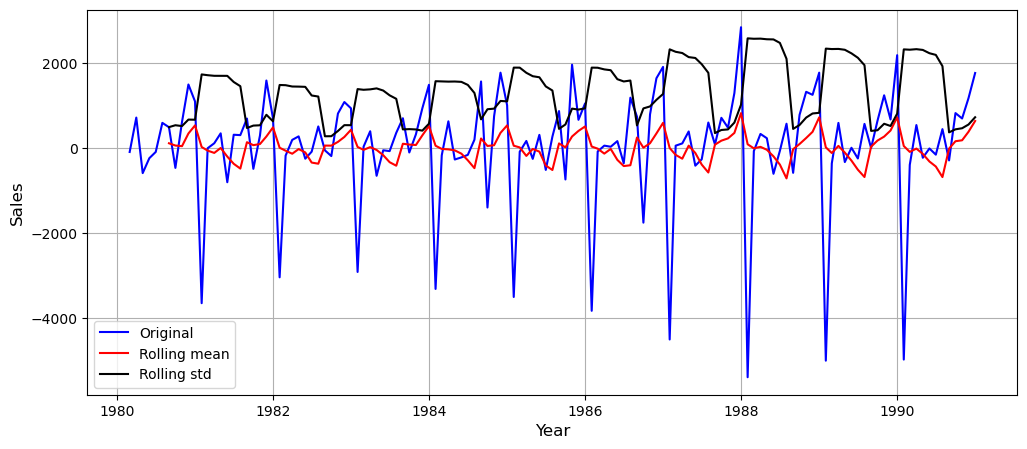

Results of Dickey-Fuller test
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical value (1%)           -3.486535e+00
Critical value (5%)           -2.886151e+00
Critical value (10%)          -2.579896e+00
dtype: float64 



In [ ]:
test_stationarity(train['Sparkling'].diff().dropna()) #d = 1

**We see that at α = 0.05 the Time Series is indeed stationary.**

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3) #p=0,1,2... q=0,1,2
d= range(1,2) # d=1
pdq = list(itertools.product(p, d, q))
print('Parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns = ['Params', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [Params, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values, order = param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'Params':param, 'AIC':ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918632
ARIMA(0, 1, 2) - AIC:2234.408323131029
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.755094673289
ARIMA(1, 1, 2) - AIC:2234.52720045196
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262835705
ARIMA(2, 1, 2) - AIC:2213.5092126330856


In [ ]:
ARIMA_AIC.sort_values(by='AIC').head()

Params          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095

In [ ]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2, 1, 2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 13 May 2023   AIC                           2213.509
Time:                        01:20:30   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
#Model evaluation
rmse_model_ARIMA = metrics.mean_squared_error(test['Sparkling'], predicted_auto_ARIMA, squared = False)
print("For ARIMA (2, 1, 2), ARIMA forecast on test set, RMSE is", rmse_model_ARIMA)

For ARIMA (2, 1, 2), ARIMA forecast on test set, RMSE is 1299.9798545491028


In [ ]:
results_ARIMA = pd.DataFrame({'Test RMSE':[rmse_model_ARIMA]}, index=['ARIMA (2, 1, 2)'])

results_DF = pd.concat([results_DF, results_ARIMA])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867
Triple Exp Smoothing (alpha = 0.111, beta = 0.1...   378.944325
Triple Exp Smoothing (alpha = 0.8, beta = 1, ga...   580.266110
ARIMA (2, 1, 2)                                     1299.979855

# SARIMA Model

Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

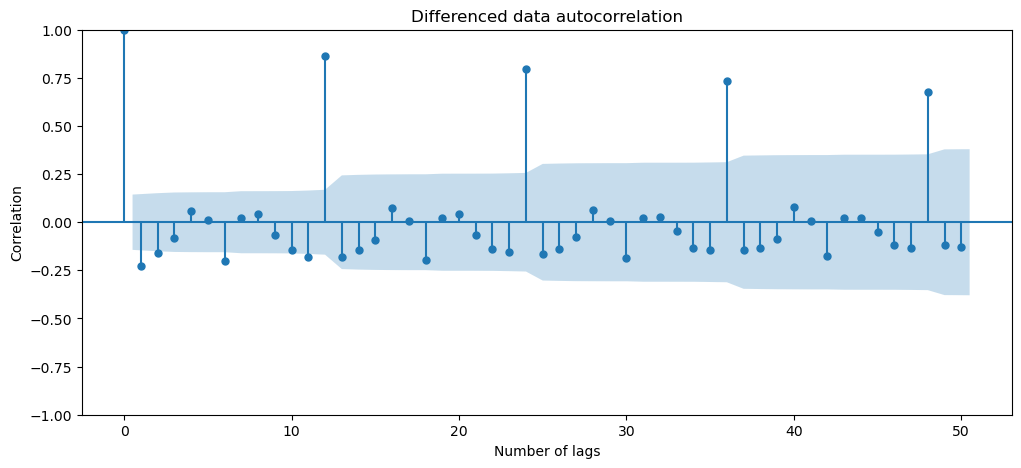

In [ ]:
plot_acf(df['Sparkling'].diff().dropna(), lags = 50)
plt.xlabel('Number of lags')
plt.ylabel('Correlation')
plt.title('Differenced data autocorrelation');

We see that there can be a seasonality of 12. We will run our auto SARIMA model by setting seasonality as 12.

In [ ]:
import itertools
p = q = range(0, 3) #p,q= 0,1,2
d= range(1,2) # d=1
D = range(0,1) # D=0
P=Q = range(0,3) # P=Q=0,1,2
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns = ['Param', 'Seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [Param, Seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter = 1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'Param':param, 'Seasonal':param_seasonal, 'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844453
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235048
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791728
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610756
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920838
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566644
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573232686
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183831
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193787917
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653954556
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178471
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085315317
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018826494944
SARIMA(0, 1, 2

In [ ]:
SARIMA_AIC.sort_values(by = 'AIC').head()

Param       Seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934564
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [ ]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                       order = (1, 1, 2),
                                       seasonal_order = (1, 0, 2, 12),
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)

results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 13 May 2023   AIC                           1555.584
Time:                                    01:23:39   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

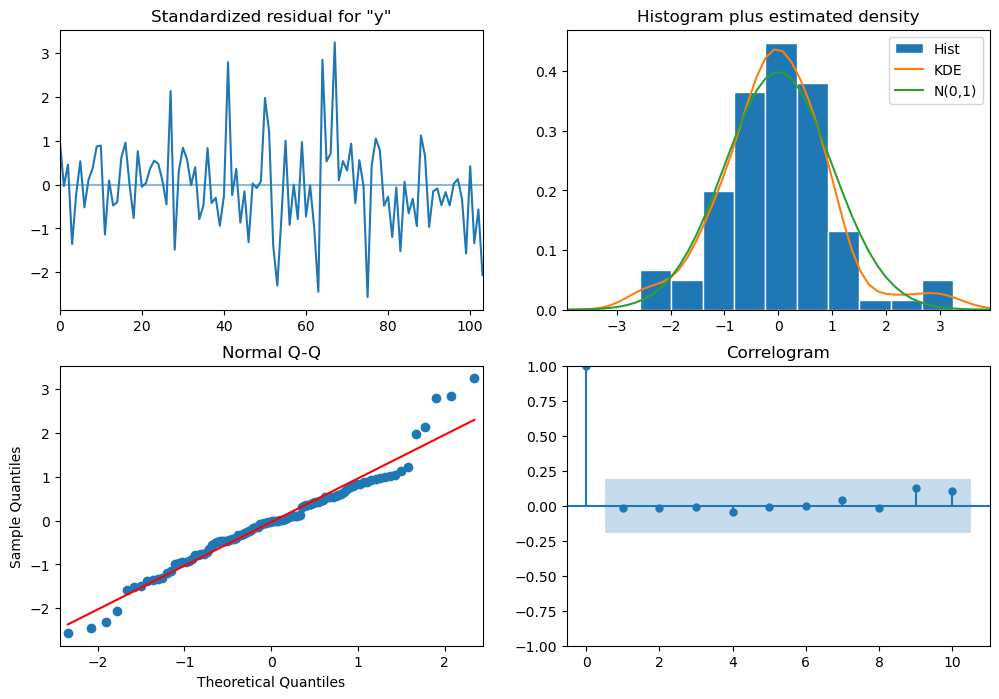

In [ ]:
results_auto_SARIMA.plot_diagnostics(figsize=(12,8))
plt.show();

In [ ]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [ ]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.383855  388.341046     566.249390    2088.518319
1  1315.106803  402.005724     527.190062    2103.023544
2  1621.591834  401.999329     833.687628    2409.496041
3  1598.860196  407.237390     800.689579    2397.030813
4  1392.689935  407.967739     593.087860    2192.292009

In [ ]:
#Model evaluation
rmse_SARIMA = metrics.mean_squared_error(test['Sparkling'], predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse_SARIMA)

528.6072314729262


In [ ]:
results_SARIMA = pd.DataFrame({'Test RMSE': [rmse_SARIMA]}, index = ["SARIMA (1, 1, 2) (1, 0, 2, 12)"])

results_DF = pd.concat([results_DF, results_SARIMA])
results_DF

Test RMSE
Regression on time                                  1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-point trailing Moving Average                     3046.976092
4-point trailing Moving Average                     2021.855880
6-point trailing Moving Average                     1521.611250
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867
Triple Exp Smoothing (alpha = 0.111, beta = 0.1...   378.944325
Triple Exp Smoothing (alpha = 0.8, beta = 1, ga...   580.266110
ARIMA (2, 1, 2)                                     1299.979855
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.607231

# 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
results_DF.sort_values(by='Test RMSE')

Test RMSE
Triple Exp Smoothing (alpha = 0.111, beta = 0.1...   378.944325
Triple Exp Smoothing (alpha = 0.111, beta = 0.4...   403.125867
SARIMA (1, 1, 2) (1, 0, 2, 12)                       528.607231
Triple Exp Smoothing (alpha = 0.8, beta = 1, ga...   580.266110
Simple Average Model                                1275.081804
ARIMA (2, 1, 2)                                     1299.979855
9-point trailing Moving Average                     1304.618912
Simple Exp Smoothing (alpha = 0.0496)               1316.034674
Regression on time                                  1389.135175
6-point trailing Moving Average                     1521.611250
Double Exp Smoothing (alpha = 0.1, beta = 0.1)      1778.564670
Simple Exp Smoothing (alpha = 0.3)                  1935.507132
Double Exp Smoothing (alpha = 0.688, beta = 0.0...  2007.238526
4-point trailing Moving Average                     2021.855880
2-point trailing Moving Average                     3046.976092
Naive Model                                         3864.279352

# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.124,
                                                                 smoothing_seasonal=0.461)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 375.72312581431


In [ ]:
# Getting the predictions for  future 12 months
prediction = fullmodel.forecast(steps=12)

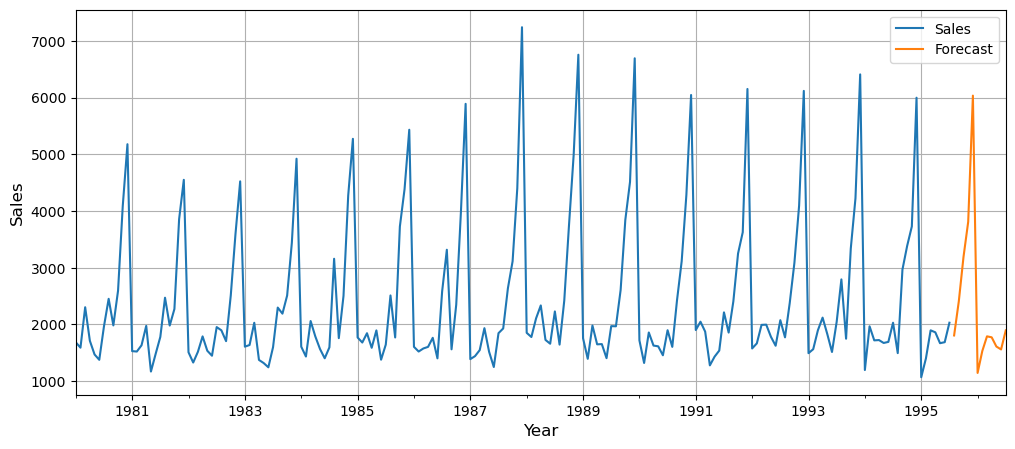

In [ ]:
df.plot()
prediction.plot()

plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

plt.legend(['Sales', 'Forecast'])
plt.grid();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1068.181635  1806.558296  2544.934958
1995-09-30  1670.160223  2408.536884  3146.913546
1995-10-31  2453.111255  3191.487917  3929.864578
1995-11-30  3072.544309  3810.920971  4549.297632
1995-12-31  5297.397280  6035.773942  6774.150603

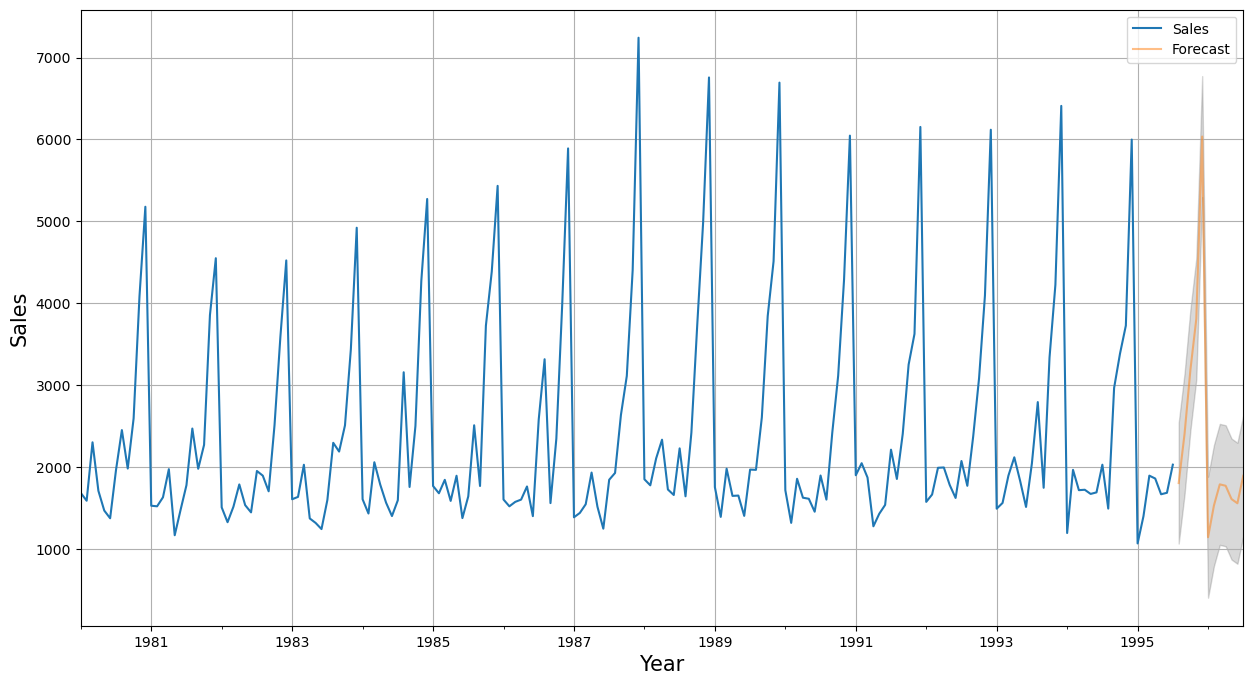

In [ ]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year', fontsize=15)
axis.set_ylabel('Sales', fontsize=15)
plt.legend(['Sales', 'Forecast'])
plt.grid()
plt.show();

# END